In [37]:
import os
import pandas as pd
import numpy as np
import scipy.sparse as sp
import torch

In [38]:
data_dir = '/home/ashvinee/Documents/Ferrato/Data/all_ings/'

ingg = pd.read_csv('/home/ashvinee/Documents/Ferrato/Data/all_ingredients_name.csv')
col = list(ingg.In)
cols = ['Dish Type','Title']+col

citations = pd.read_csv(
    "/home/ashvinee/Documents/Ferrato/Data/breakfast_ingredients_835_final6.csv",
    sep=",",
    header=None,
    names=cols,
)

citations = citations.reset_index()
citations = citations.drop(citations.index[0])
citations = citations.drop('level_0', axis=1)
citations = citations.drop('level_1', axis=1)
citations = citations.drop('level_2', axis=1)
title = citations.Title.values
#citations = citations.drop('Title', axis=1)

/home/ashvinee/.local/share/virtualenvs/Ferrato-aimIbf9P/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,2

In [39]:
citations

,Dish Type,Title,salt,pepper,butter,garlic,sugar,flour,onion,olive oil,...,cooked meatballs,beef sausage,mulberries,fine egg noodles,linguica,poblano chilies,crystal hot sauce,watercress leaves,emerils essence,corn flakes cereal
1,0,283,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,101,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,463,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,283,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,110,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,1,468,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
851,1,165,1,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
852,1,165,1,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
853,1,128,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
cc = citations.to_numpy().astype(int)

In [41]:
features = sp.csr_matrix(cc, dtype=np.float32)

In [42]:
def encode_onehot(labels):
    classes = set(labels)
    classes_dict = {c: np.identity(len(classes))[i, :] for i, c in
                    enumerate(classes)}
    labels_onehot = np.array(list(map(classes_dict.get, labels)),
                             dtype=np.int32)
    return labels_onehot


In [43]:
labels = encode_onehot(cc[:,0])

In [44]:
title = title.astype(int)

In [45]:
# build graph
idx = np.array(title, dtype=np.int32)
idx_map = {j: i for i, j in enumerate(idx)}

In [73]:
#edges_unordered = np.genfromtxt("{}{}.cites".format(path, dataset), dtype=np.int32)
edges_unordered = pd.read_csv(
    "/home/ashvinee/Documents/Ferrato/Data/similar_ingredients.csv",
    sep=",",
    header=None,
    names=['FTitle', 'STitle', 'Sting'],
)

In [74]:
edges_unordered

,FTitle,STitle,Sting
NaN,FTitle,STitle,Sting
1.0,283,239,22
2.0,283,310,22
4.0,283,66,22
5.0,283,251,22
...,...,...,...
253.0,292,193,17
254.0,292,190,17
255.0,292,37,17
256.0,292,75,17


In [75]:
edges_unordered = edges_unordered.reset_index()
edges_unordered = edges_unordered.drop('index', axis=1)
#edges_unordered = edges_unordered.drop('Sting', axis=1)
edges_unordered = edges_unordered.drop(index=0, axis=0)

In [49]:
edges_unordered = edges_unordered.to_numpy().astype(int)

In [50]:
edges = np.array(list(map(idx_map.get, edges_unordered.flatten())),
                     dtype=np.int32).reshape(edges_unordered.shape)

In [51]:
edges

array([[104,  77, 737],
       [104,  88, 737],
       [104, 169, 737],
       [104, 226, 737],
       [ 70, 122, 553],
       [ 70, 122, 553],
       [ 70, 122, 553],
       [ 70, 234, 553],
       [136,  18, 651],
       [  8, 105, 350],
       [  8, 178, 350],
       [  8, 294, 350],
       [  8, 213, 350],
       [  7,  68, 281],
       [  7, 100, 281],
       [  7, 100, 281],
       [  7, 144, 281],
       [ 12, 106,  39],
       [ 12, 149,  39],
       [ 12, 160,  39],
       [ 12, 177,  39],
       [ 12, 297,  39],
       [ 12, 301,  39],
       [ 12, 211,  39],
       [ 10,  65, 316],
       [ 10, 109, 316],
       [ 10, 109, 316],
       [ 10, 147, 316],
       [ 10, 157, 316],
       [ 10, 217, 316],
       [ 10, 218, 316],
       [ 10, 223, 316],
       [ 14,  15, 743],
       [ 14,  47, 743],
       [ 14,  47, 743],
       [ 14,  52, 743],
       [ 14,  52, 743],
       [ 14, 102, 743],
       [ 14, 102, 743],
       [ 14, 170, 743],
       [ 14, 175, 743],
       [ 14, 184

In [52]:
adj = sp.coo_matrix((np.ones(edges.shape[0]), (edges[:, 0], edges[:, 1])),
                        shape=(labels.shape[0], labels.shape[0]),
                        dtype=np.float32)

In [53]:
# build symmetric adjacency matrix
adj = adj + adj.T.multiply(adj.T > adj) - adj.multiply(adj.T > adj)

In [54]:
def normalize(mx):
    """Row-normalize sparse matrix"""
    rowsum = np.array(mx.sum(1))
    r_inv = np.power(rowsum, -1).flatten()
    r_inv[np.isinf(r_inv)] = 0.
    r_mat_inv = sp.diags(r_inv)
    mx = r_mat_inv.dot(mx)
    return mx

In [55]:
features = normalize(features)
adj = normalize(adj + sp.eye(adj.shape[0]))

In [56]:
idx_train = range(140)
idx_val = range(200, 500)
idx_test = range(500, 1500)

In [57]:
def sparse_mx_to_torch_sparse_tensor(sparse_mx):
    """Convert a scipy sparse matrix to a torch sparse tensor."""
    sparse_mx = sparse_mx.tocoo().astype(np.float32)
    indices = torch.from_numpy(
        np.vstack((sparse_mx.row, sparse_mx.col)).astype(np.int64))
    values = torch.from_numpy(sparse_mx.data)
    shape = torch.Size(sparse_mx.shape)
    return torch.sparse.FloatTensor(indices, values, shape)

In [58]:
features = torch.FloatTensor(np.array(features.todense()))
labels = torch.LongTensor(np.where(labels)[1])

In [59]:
adj = sparse_mx_to_torch_sparse_tensor(adj)

In [60]:
idx_train = torch.LongTensor(idx_train)
idx_val = torch.LongTensor(idx_val)
idx_test = torch.LongTensor(idx_test)

In [61]:
adj

tensor(indices=tensor([[  0,   1,   2,  ..., 851, 852, 853],
                       [  0,   1,   2,  ..., 851, 852, 853]]),
       values=tensor([1., 1., 1.,  ..., 1., 1., 1.]),
       size=(854, 854), nnz=1176, layout=torch.sparse_coo)

In [62]:
# tensor(indices=tensor([[   0,    8,   14,  ..., 1389, 2344, 2707],
#                        [   0,    0,    0,  ..., 2707, 2707, 2707]]),
#        values=tensor([0.1667, 0.1667, 0.0500,  ..., 0.2000, 0.5000, 0.2500]),
#        size=(2708, 2708), nnz=13264, layout=torch.sparse_coo)

In [142]:
features

tensor([[0.0000, 0.9279, 0.0033,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.6121, 0.0061,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.8887, 0.0019,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0047, 0.7746, 0.0047,  ..., 0.0000, 0.0000, 0.0000],
        [0.0062, 0.7950, 0.0062,  ..., 0.0000, 0.0000, 0.0000],
        [0.0064, 0.8205, 0.0064,  ..., 0.0000, 0.0000, 0.0000]])

In [64]:
labels[:50]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])

In [65]:
# tensor([5, 3, 4,  ..., 0, 6, 5])

In [66]:
idx_train[:10]

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [67]:
idx_val[:10]

tensor([200, 201, 202, 203, 204, 205, 206, 207, 208, 209])

In [68]:
idx_test[:10]

tensor([500, 501, 502, 503, 504, 505, 506, 507, 508, 509])

In [69]:
import networkx as nx
import matplotlib.pyplot as plt

In [70]:
edges_unordered

array([[283, 239,  22],
       [283, 310,  22],
       [283,  66,  22],
       [283, 251,  22],
       [463,  97,  58],
       [463,  97,  58],
       [463,  97,  58],
       [463, 160,  58],
       [110, 168,  54],
       [263, 273,  25],
       [263,  18,  25],
       [263, 372,  25],
       [263, 344,  25],
       [ 56, 373,  52],
       [ 56, 141,  52],
       [ 56, 141,  52],
       [ 56, 158,  52],
       [280, 315,  36],
       [280, 379,  36],
       [280, 349,  36],
       [280, 455,  36],
       [280, 353,  36],
       [280,  51,  36],
       [280,  87,  36],
       [361, 302,  31],
       [361, 430,  31],
       [361, 430,  31],
       [361, 265,  31],
       [361, 177,  31],
       [361, 402,  31],
       [361, 157,  31],
       [361, 260,  31],
       [102, 284,  41],
       [102, 437,  41],
       [102, 437,  41],
       [102, 347,  41],
       [102, 347,  41],
       [102, 124,  41],
       [102, 124,  41],
       [102, 148,  41],
       [102, 169,  41],
       [102,  92

In [71]:
cc

array([[  0, 283,   1, ...,   0,   0,   0],
       [  0, 101,   1, ...,   0,   0,   0],
       [  0, 463,   1, ...,   0,   0,   0],
       ...,
       [  1, 165,   1, ...,   0,   0,   0],
       [  1, 128,   1, ...,   0,   0,   0],
       [  1, 128,   1, ...,   0,   0,   0]])

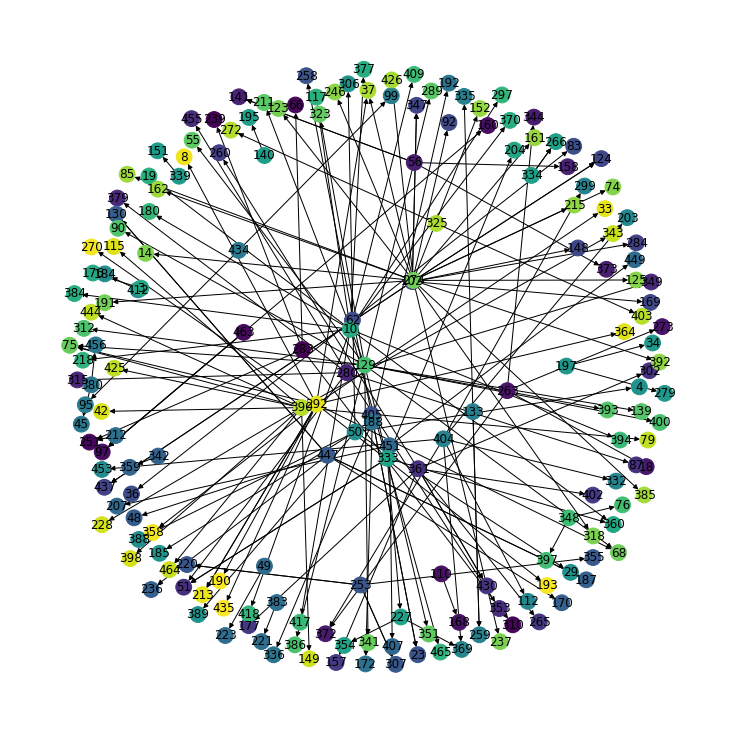

In [85]:
plt.figure(figsize=(10, 10))
colors = citations["Title"].tolist()
cora_graph = nx.from_pandas_edgelist(edges_unordered, source='FTitle', target='STitle',
                                     edge_attr=True,
                                     create_using=nx.MultiDiGraph)
subjects = list(citations[citations.index.isin(list(cora_graph.nodes))]["Title"])
#cc = [1,2,3,4,5,6].append(list(citations[citations.index.isin(list(cora_graph.nodes))]["Title"]))
#cc = ['#A0CBE2'].append(['#FF0000' for i in range(188)])
cc = [i for i in range(189)]
nx.draw_spring(cora_graph, node_size=250, node_color=cc, with_labels=True)


In [102]:
len(cora_graph.nodes)

189

In [80]:
cora_graph.edges

OutMultiEdgeView([('283', '239', 0), ('283', '310', 0), ('283', '66', 0), ('283', '251', 0), ('463', '97', 0), ('463', '97', 1), ('463', '97', 2), ('463', '160', 0), ('110', '168', 0), ('263', '273', 0), ('263', '18', 0), ('263', '372', 0), ('263', '344', 0), ('56', '373', 0), ('56', '141', 0), ('56', '141', 1), ('56', '158', 0), ('280', '315', 0), ('280', '379', 0), ('280', '349', 0), ('280', '455', 0), ('280', '353', 0), ('280', '51', 0), ('280', '87', 0), ('361', '302', 0), ('361', '430', 0), ('361', '430', 1), ('361', '265', 0), ('361', '177', 0), ('361', '402', 0), ('361', '157', 0), ('361', '260', 0), ('102', '284', 0), ('102', '437', 0), ('102', '437', 1), ('102', '347', 0), ('102', '347', 1), ('102', '124', 0), ('102', '124', 1), ('102', '148', 0), ('102', '169', 0), ('102', '92', 0), ('62', '36', 0), ('62', '83', 0), ('405', '258', 0), ('405', '23', 0), ('405', '23', 1), ('253', '220', 0), ('253', '220', 1), ('253', '307', 0), ('253', '307', 1), ('253', '355', 0), ('447', '48'

In [97]:
dict(cora_graph.degree).values()

dict_values([4, 1, 1, 1, 2, 4, 3, 1, 1, 1, 4, 1, 1, 2, 1, 4, 1, 2, 1, 7, 1, 1, 1, 1, 1, 3, 1, 8, 1, 2, 1, 1, 1, 1, 1, 10, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 3, 1, 2, 5, 2, 2, 1, 7, 1, 2, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 2, 1, 1, 3, 2, 1, 7, 1, 1, 2, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 3, 1, 5, 1, 2, 1, 1, 14, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 14, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 17, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 12, 1, 2, 1, 1, 1, 1, 1, 1])

In [82]:
plt.savefig("path.png")

<Figure size 432x288 with 0 Axes>

In [107]:
A = nx.to_numpy_array(cora_graph)

In [108]:
N = A.shape[0] # number of nodes in a graph
N

189

In [109]:
D = np.sum(A, 0) # node degrees
D

array([0., 1., 1., 1., 2., 0., 3., 1., 0., 1., 0., 1., 1., 2., 1., 0., 1.,
       2., 1., 0., 1., 1., 1., 1., 1., 3., 1., 0., 1., 2., 1., 1., 1., 1.,
       1., 0., 1., 2., 2., 2., 1., 1., 1., 0., 1., 1., 0., 1., 2., 0., 2.,
       2., 1., 0., 1., 2., 1., 2., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 2., 1., 0., 1.,
       1., 2., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 0., 2., 1., 1., 0., 1., 2., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 2., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 2., 1., 1., 1., 1.,
       1., 1.])

In [111]:
D_hat = np.diag((D + 1e-5)**(-0.5)) # normalized node degrees
D_hat

array([[316.22776602,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.999995  ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.999995  , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.999995  ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.999995  ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.999995  ]])

In [113]:
L = np.identity(N) - np.dot(D_hat, A).dot(D_hat) # Laplacian

In [114]:
L

array([[   1.        , -316.22618489, -316.22618489, ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    1.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    1.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    1.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           1.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    1.        ]])

In [116]:
'''
A is symmetric, i.e. A = Aᵀ and 
our graph is undirected,
otherwise node degrees are not well-defined and some assumptions must be made to compute the Laplacian
'''

'\nA is symmetric, i.e. A = Aᵀ and \nour graph is undirected,\notherwise node degrees are not well-defined and some assumptions must be made to compute the Laplacian\n'

In [117]:
'''
An interesting property of an adjacency matrix A is that Aⁿ 
(matrix product taken n times) exposes n-hop connections between nodes
'''

'\nAn interesting property of an adjacency matrix A is that Aⁿ \n(matrix product taken n times) exposes n-hop connections between nodes\n'

In [120]:
!pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)


In [ ]:
'''
https://towardsdatascience.com/spectral-graph-convolution-explained-and-implemented-step-by-step-2e495b57f801
Spectral Networks and Deep Locally Connected Networks on Graphs research paper
http://blog.shriphani.com/2015/04/06/the-smallest-eigenvalues-of-a-graph-laplacian/
https://github.com/bknyaz
'''

In [121]:
import matplotlib.pyplot as plt
import seaborn as sb

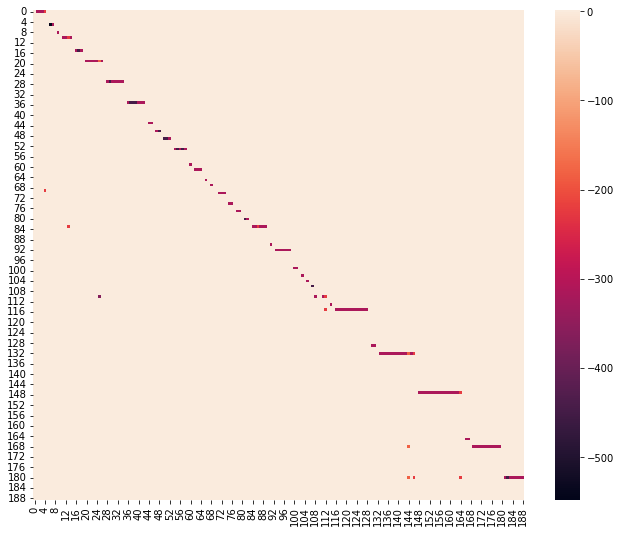

In [122]:
fig, ax = plt.subplots(figsize=(11, 9))
sb.heatmap(L)
plt.show()

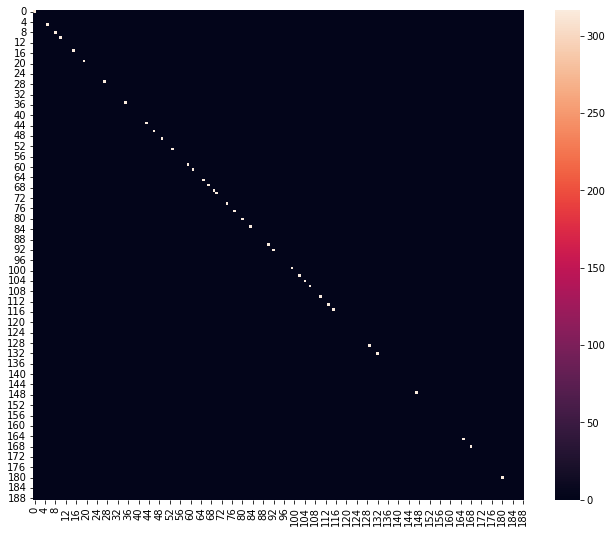

In [123]:
fig, ax = plt.subplots(figsize=(11, 9))
sb.heatmap(D_hat)
plt.show()

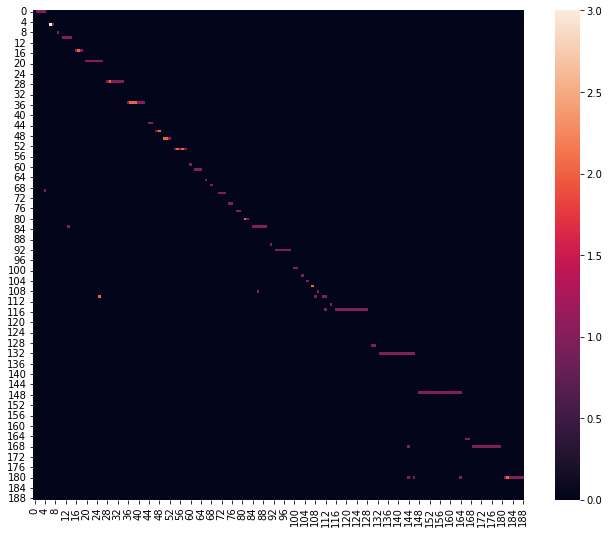

In [125]:
fig, ax = plt.subplots(figsize=(11, 9))
sb.heatmap(A)
plt.show()

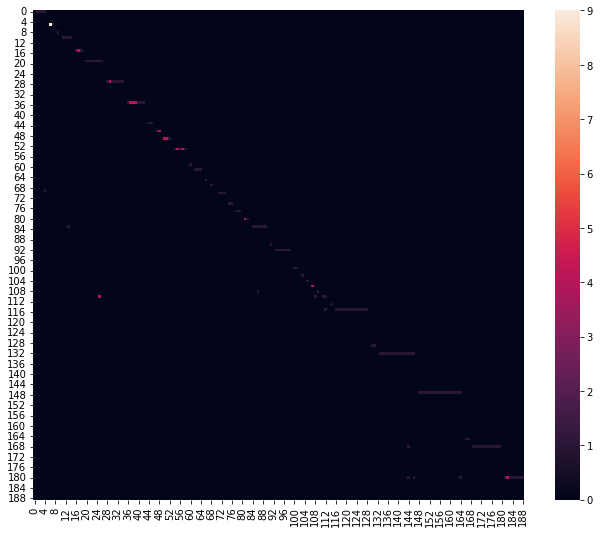

In [127]:
fig, ax = plt.subplots(figsize=(11, 9))
sb.heatmap(A*A)
plt.show()

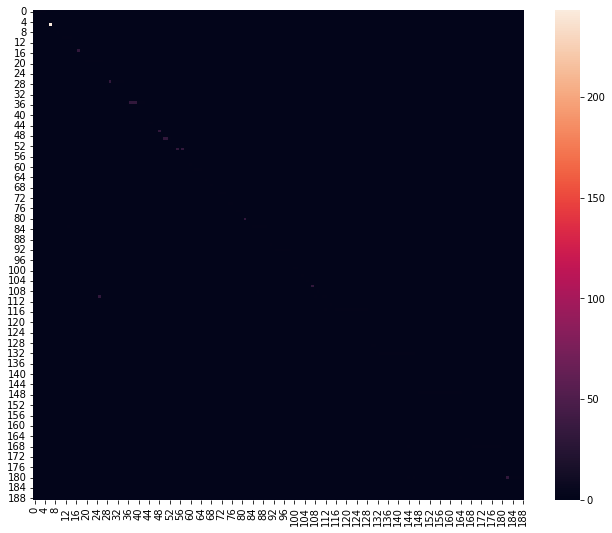

In [129]:
fig, ax = plt.subplots(figsize=(11, 9))
sb.heatmap(A**5)
plt.show()

In [133]:
'''
use a few eigenvectors corresponding to the smallest eigenvalues. 
'''

'\nuse a few eigenvectors corresponding to the smallest eigenvalues. \n'

In [134]:
 '''
 it seems to be an opposite strategy compared to frequently used in computer vision 
 Principal component analysis (PCA), where we are more interested in the eigenvectors 
 corresponding to the largest eigenvalues.
 '''

'\nit seems to be an opposite strategy compared to frequently used in computer vision \nPrincipal component analysis (PCA), where we are more interested in the eigenvectors \ncorresponding to the largest eigenvalues.\n'

In [135]:
# Spectral convolution on graphs
# X is an N×1 matrix of 1-dimensional node features
# L is an N×N graph Laplacian computed above
# W_spectral are N×F weights (filters) that we want to train

In [136]:
from scipy.sparse.linalg import eigsh # assumes L to be symmetric

In [184]:
X = features.cpu().detach().numpy()
Xx = np.expand_dims(X[0][:189], axis=1)
Xx.shape

(189, 1)

In [176]:
Λ,V = eigsh(L,k=3502,which='SM') # eigen-decomposition (i.e. find Λ,V)

In [177]:
Λ

array([-4.82044618e+02, -3.77715228e+02, -2.22606239e+02, -2.22606239e+02,
       -2.22606239e+02, -1.51449075e+02,  4.65481007e-01,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  

In [178]:
V

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [185]:
X_hat = V.T.dot(Xx) # 20×1 node features in the "spectral" domain

In [192]:
from IPython.display import Image
Image(url= "2.png", width=800, height=800)

In [186]:
W_spectral = np.random.rand(189,189)
W_hat = V.T.dot(W_spectral)  # 20×F filters in the "spectral" domain

In [187]:
Y = V.dot(X_hat * W_hat)  # N×F result of convolution

In [188]:
Y

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.45077331e-01, 5.12223579e-01, 5.46054455e-01, ...,
        8.81730528e-01, 1.55664811e-01, 2.53090094e-01],
       [3.72883144e-04, 2.44305891e-03, 3.04752871e-03, ...,
        2.20424098e-03, 1.25812439e-03, 3.53938351e-04],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [191]:
from IPython.display import Image
Image(url= "1.png", width=800, height=800)

In [193]:
'''
To summarize, smoothing in the spectral domain allowed Bruna et al. to learn more local filters. 
The model with such filters can achieve similar results as the model without smoothing 
(i.e. using our formula (3)), but with much fewer trainable parameters, because the filter size 
is independent of the input graph size, which is important to scale the model to datasets with 
larger graphs. However, learned filters W_spectral still depend on eigenvectors V, which makes 
it challenging to apply this model to datasets with variable graph structures.
'''

'\nTo summarize, smoothing in the spectral domain allowed Bruna et al. to learn more local filters. \nThe model with such filters can achieve similar results as the model without smoothing \n(i.e. using our formula (3)), but with much fewer trainable parameters, because the filter size \nis independent of the input graph size, which is important to scale the model to datasets with \nlarger graphs. However, learned filters W_spectral still depend on eigenvectors V, which makes \nit challenging to apply this model to datasets with variable graph structures.\n'

In [194]:
'''
spectral filters can better capture global complex patterns in graphs, which local methods like GCN 
(Kipf & Welling, ICLR, 2017) cannot unless stacked in a deep network. 
'''

'\nspectral filters can better capture global complex patterns in graphs, which local methods like GCN \n(Kipf & Welling, ICLR, 2017) cannot unless stacked in a deep network. \n'

In [195]:
'''
Another interesting work of Levie et al., 2018 on “CayleyNets” showed strong performance in 
node classification, matrix completion (recommender systems) and community detection.
'''

'\nAnother interesting work of Levie et al., 2018 on “CayleyNets” showed strong performance in \nnode classification, matrix completion (recommender systems) and community detection.\n'